
# Project: Investigate a Dataset (TMDb movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I choose the TMDB movie data set for data analysis. This data set contains information about 10,000 movies  including user ratings and revenue.I would like to find other intresting things in the  TMDB dataset


>1-The Highest or Lowest Profit of  Movies?

>2-year that has the highest number  release of movies?

>3-Movie with Longest And Shortest Rintime?

>4-which genres is most common?

>5-does higher budget due to high revenue?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
tmdb_df=pd.read_csv('tmdb-movies.csv')

In [3]:
tmdb_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### notes
release_date is object type<br>

type of currency not exist  i will assume its in dollar

### <font color='red'>Fixing Data types</font>  

release_date is object types need to convert it into datetime

In [6]:
tmdb_df.release_date=pd.to_datetime(tmdb_df.release_date)

In [7]:
tmdb_df.release_date[:5]

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

from the describe method i have notice that revenue and budget columns have a zero value (min)
this make calculate the profit is incorect

In [8]:
tmdb_df[(tmdb_df['budget']==0)].shape

(5696, 21)

In [9]:
tmdb_df[(tmdb_df['revenue']==0)].shape

(6016, 21)


### Data Cleaning (dealing with messing Values)

In [10]:
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

homepage column is have 7930 null values so i will remove it<br>
tagline also has alot of null values

In [11]:
tmdb_df.drop(['homepage','tagline'],inplace=True,axis=1)

### Delete unwanted columns

In [12]:
tmdb_df.drop(['budget_adj','revenue_adj','overview','imdb_id'],axis =1,inplace = True)

In [13]:
tmdb_df.shape


(10866, 15)

In [14]:
tmdb_df.fillna(0,inplace=True)

### <font color='red'>Remove Duplicate</font>  

In [15]:
tmdb_df.duplicated().sum()

1

In [16]:
tmdb_df.drop_duplicates(inplace=True)

In [17]:
tmdb_df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 ( The Highest or Lowest Profit of  Movies?)

### movie with the highest and lowest revenue

In [18]:
tmdb_df['profit'] = tmdb_df['revenue'] - tmdb_df['budget']

In [19]:
def get_max_min (df,df_column):
    max_= df[['original_title',df_column]][df[df_column]==df[df_column].max()].iloc[0]
    min_= df[['original_title',df_column]][df[df_column]==df[df_column].min()].iloc[0]
    return max_.head(),min_.head()
    

In [20]:
get_max_min(tmdb_df,'revenue')

(original_title        Avatar
 revenue           2781505847
 Name: 1386, dtype: object,
 original_title    Wild Card
 revenue                   0
 Name: 48, dtype: object)

### movie with the highest and lowest profit

In [21]:
get_max_min(tmdb_df,'profit')

(original_title        Avatar
 profit            2544505847
 Name: 1386, dtype: object,
 original_title    The Warrior's Way
 profit                   -413912431
 Name: 2244, dtype: object)

>Avatar has the higher revnue 

>The Warrior's Way has the lowest revnue 

In [22]:
sorted_tmdb=tmdb_df.sort_values(by=['profit'],ascending=False)

In [23]:
x=sorted_tmdb.original_title[:5]
y=sorted_tmdb.profit[:5]

In [24]:
title="Most Profit movies"
xlabel="profit"
ylabel="orginal_title"

In [25]:
def plot_point(x,y,title,xlabel,ylabel):
    ax=sns.pointplot(x=y,y=x)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    

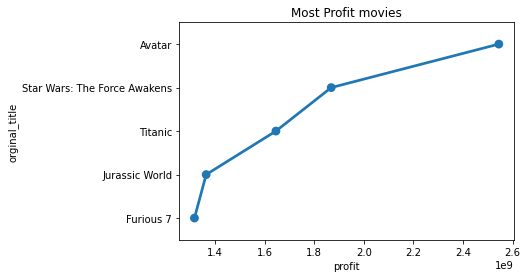

In [26]:
plot_point(x,y,title,xlabel,ylabel)

### Research Question 2  (year that has the highest number  release of movies)

In [27]:
data_year=tmdb_df.groupby('release_year').count()['id']

In [28]:
data_year.sort_values(ascending=False)[:5]

release_year
2014    700
2013    659
2015    629
2012    588
2011    540
Name: id, dtype: int64

In [29]:
data_year.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

Text(0.5, 1.0, 'highest number of movies ')

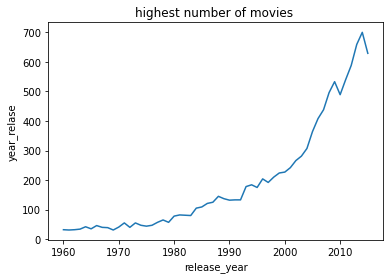

In [30]:
data_year.plot()
plt.ylabel("number of movies")
plt.ylabel('year_relase')
plt.title("highest number of movies ")


2014 has the hgiest number of movies

### Research Question 3  (Movie with Longest And Shortest Rintime?)

In [31]:
sorted_runtime=tmdb_df.sort_values(by=['runtime'],ascending=False)

In [32]:
sorted_runtime.runtime[:5]

3894    900
4041    877
2722    705
6176    566
6181    561
Name: runtime, dtype: int64

In [33]:
sorted_runtime.runtime.tail()

3329    0
4138    0
1241    0
6383    0
5216    0
Name: runtime, dtype: int64

    there is no movie with runtime zero so i am gonna to change it to nan

In [34]:
sorted_runtime.runtime.replace(0,np.NAN,inplace=True)

In [35]:
get_max_min(sorted_runtime,'runtime')

(original_title    The Story of Film: An Odyssey
 runtime                                     900
 Name: 3894, dtype: object,
 original_title    Cousin Ben Troop Screening
 runtime                                    2
 Name: 4890, dtype: object)

In [36]:
xx=sorted_runtime.original_title[:5]
yy=sorted_runtime.runtime[:5]
title="Most runtime movies"
xlabel='original_title'
ylabel="runtime"

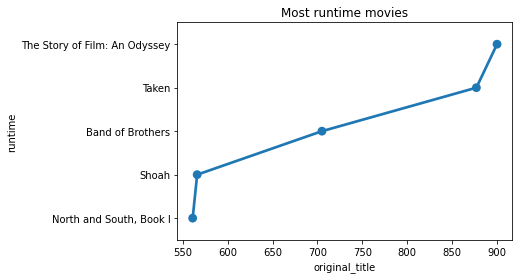

In [37]:
plot_point(xx,yy,title,xlabel,ylabel)

>the longest runtime of a movie is 900

>the shortest runtime of a movie is 2


### Research Question 4  (which genres is most common?)

In [38]:
tmdb_df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'profit'],
      dtype='object')

In [39]:
genres_df=tmdb_df.groupby('genres').count()['id']

In [40]:
plot_gen=genres_df.sort_values(ascending=False)

In [41]:
x =plot_gen[:10].values

In [42]:
x 

array([712, 712, 312, 289, 280, 268, 259, 253, 222, 138], dtype=int64)

<AxesSubplot:ylabel='id'>

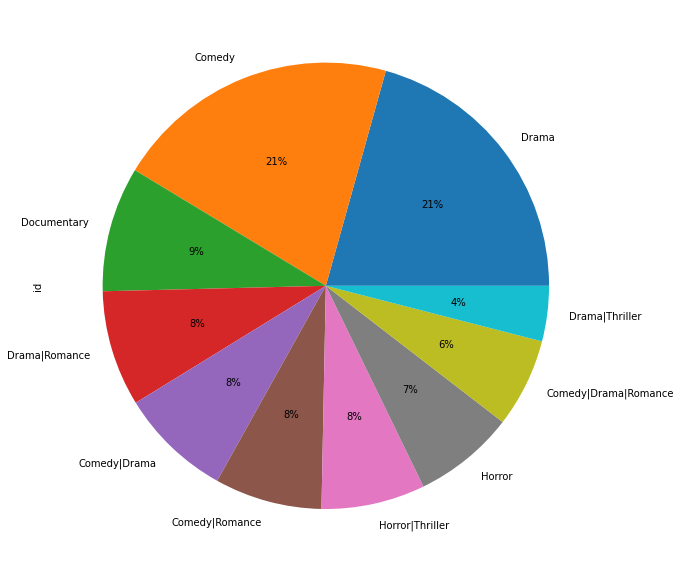

In [43]:
plot_gen[:10].plot(kind="pie",figsize=(10,15),autopct='%.0f%%')

### Research Question 5  (does higher budget due to high revenue?)

In [44]:
tmdb_df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'profit'],
      dtype='object')

No handles with labels found to put in legend.


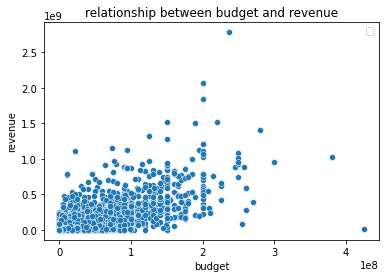

In [50]:
ax=sns.scatterplot(x='budget',y='revenue',data=tmdb_df)
ax.set_title("relationship between budget and revenue")
ax.set_xlabel("budget")
ax.set_ylabel("revenue")
ax.legend()

it looks like that movies with higher budget cause high revenue

<a id='conclusions'></a>
## Conclusions

i answer a five question based on tmdb dataset with clear answer and make visulisation to support it
>Avatar has the higher revnue

>The Warrior's Way has the lowest revnue 

>2014 has the hgiest number of movies

>Drama and are action the most common genre

>movies with higher budget cause high revenue

## Limitation

data have alot of null values 
calculating the profit we  made may this is not the right way t do it
currency have no unit to measure as they may be representive in different units in budget and revenue columns 




